# This notebook is in development. Come back and check it at a future time!

# *Measuring Distances in Cosmology*

Summary

# What Does it Mean to Measure a Distance?

In our everyday lives, we think of the distance between two points as being a fixed quantity. If there is a kilometer between points A and B, then that has always been the distance between points A and B, and that always will be the distance between points A and B. 

However, physics tells us that this isn't always the case. For example, in Albert Einstein's theory of Special Relativity, the distance between two galaxies is measured to be shorter when the observer is moving towards or away from from the galaxies. The faster the observer moves, the shorter the measured distance. This phenomenon is called length contraction and is one example of how physics causes distances to behave in ways that are non-intuitive.

In cosmology, there are a variety of types of distances that we are interested in measuring, and just like in Special Relativity, these distances are influenced in suprising ways by physics.

# The Expanding Universe: How Distances Change Over Time

Becuse our universe is expanding, the distance between any two points A and B will increase with time. An observer who lived far in the past (at time $t$) would measure the distance between two galaxies to have a certain value $d(t)$. If we measure the distance between those two galaxies today in the present (at time $t_f$), we will measure a larger distance: $d(t_f) > d(t)$. The ratio between the past and present distance is called the scale factor $a(t)$, and it describes how small the universe was in the past compared to today.


$$a(t) = \frac{d(t)}{d(t_f)}$$

Let's try modeling how big the universe was at various times using the scale factor

In [1]:
#Let's load some tools that will help us learn about cosmology
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

# Create a cosmology model for converting redshifts to distances
cosmology_model = FlatLambdaCDM(Om0=.315, H0=67.4)

# To translate a time t into a scale factor a(t), we will use a redshift z(t) as an intermediate quantity
# -------------------------------------------------------------------------------------------------------

# create some example redshift values (1*10^6 values between 0 and 1*10^3)
redshifts =  np.linspace(0, 1e3, int(1e6))
# create a function z(t) using our example z values
time_to_redshift = InterpolatedUnivariateSpline(cosmology_model.age(redshifts)[::-1], redshifts[::-1])

# loop through a few ages (in units of billions of years)
for age_snapshot in [.1, 1, 5, 13.8]:
    
    # age_snapshot is our time t

    # our scale factor a is calculated as a(z(t)) 
    scale_factor = cosmology_model.scale_factor(time_to_redshift(age_snapshot))

    # report how big the universe was in the past compared to today (13.8 billion years old)
    print(f'At an age of {age_snapshot} billion years, the scale factor is {scale_factor:.3f}')

    



At an age of 0.1 billion years, the scale factor is 0.032
At an age of 1 billion years, the scale factor is 0.150
At an age of 5 billion years, the scale factor is 0.447
At an age of 13.8 billion years, the scale factor is 1.000


The below code creates a visual representation of how big the universe was at each of the above "age_snapshot" times. Try changing the age_snapshot variable below from 1 to 5 to 13.8 to see the universe expand, with galaxies spreading further apart

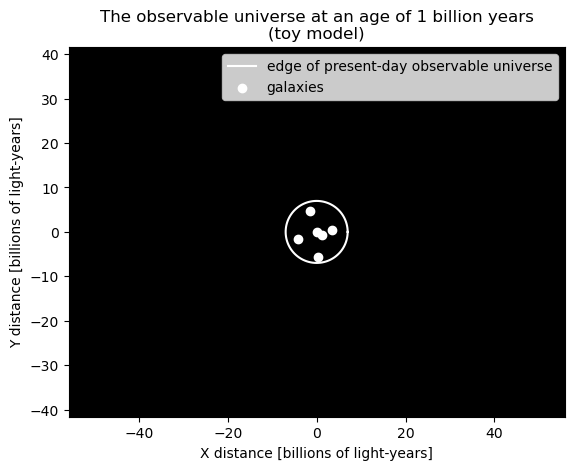

In [2]:
#Try changing this variable from 1 to 5 to 13.8, re-running the code each time
age_snapshot = 1 # age of the universe in units of billions of years

# The present-day observable universe's radius in units of billions of light years
observable_universe_radius = 46.5 

# The scale factor a(z(t))
scale_factor = cosmology_model.scale_factor(time_to_redshift(age_snapshot))

# Here we create a cartoon universe that expands over time
# --------------------------------------------------------

# Let's plot the edge of the modern day observable universe. As time goes on, light from the unobservable part of the universe will travel and reach us, 
# causing the radius of the observable universe to grow. This is a seperate effect from the universe's expansion, and we are not going to model it.
# Hence, we will plot the time evolution of the "present-day" observable universe's radius.
circle_y = [scale_factor*observable_universe_radius*np.sin(theta) for theta in np.linspace(0, 2*np.pi, 100)]
circle_x = [scale_factor*observable_universe_radius*np.cos(theta) for theta in np.linspace(0, 2*np.pi, 100)]
plt.plot(circle_x, circle_y, color='white',label='edge of present-day observable universe')

# Let's plot the locations of some galaxies. DESI alone will map out tens of millions of galaxies, 
# but for simplicity, let's put six galaxies in our model.
plt.scatter(circle_x[2]*.5, circle_y[2]*.5,c='white',label='galaxies')
plt.scatter(circle_x[30]*.7, circle_y[30]*.7,c='white')
plt.scatter(circle_x[55]*.65, circle_y[55]*.65,c='white')
plt.scatter(circle_x[75]*.8, circle_y[75]*.8,c='white')
plt.scatter(circle_x[90]*.2, circle_y[90]*.2,c='white')
plt.scatter(0, 0, c='white')

# Some graph settings
plt.axis('equal');
plt.gca().set_facecolor("black")
plt.xlim(-1.2*observable_universe_radius,1.2*observable_universe_radius)
plt.ylim(-1.2*observable_universe_radius,1.2*observable_universe_radius);
plt.xlabel('X distance [billions of light-years]')
plt.ylabel('Y distance [billions of light-years]')
plt.legend(loc='upper right')
plt.title(f'The observable universe at an age of {age_snapshot} billion years\n(toy model)');

Another way to visualize the universe's expansion is to plot how the scale factor changes over time.

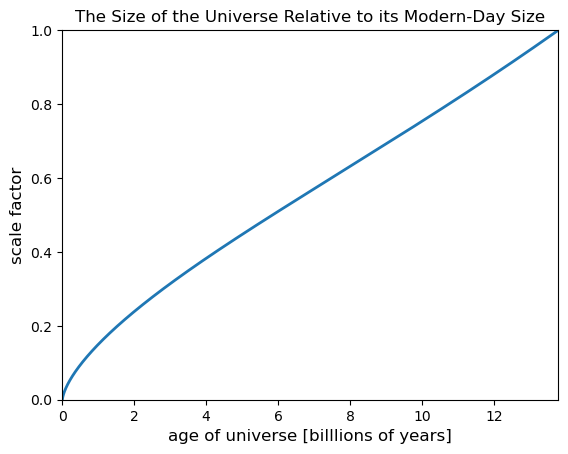

In [10]:
# The modern age of the universe at a redshift of z=0
age_of_universe = cosmology_model.age(0).value

# Let's plot the sclae factor vs. the age of the universe
age = np.linspace (1e-3, age_of_universe, 10000)
scale_factor = cosmology_model.scale_factor(time_to_redshift(age))
plt.plot(age, scale_factor, linewidth=2)
# Plot settings
plt.ylim(0, 1)
plt.xlim(0, age_of_universe)
plt.xlabel('age of universe [billlions of years]', fontsize = 12)
plt.ylabel('scale factor', fontsize = 12)
plt.title('The Size of the Universe Relative to its Modern-Day Size');

Now that we've introduced the scale factor, we're ready to start talking about the types of distances that we measure in Cosmology.

# Distances in Cosmology

Since the **physical distance** between two galaxies A and B changes over time, cosmologists often use the concept of an equivalent **comoving distance**, which is defined to preserve a constant distance between A and B. While the physical distance between the galaxies expands over time, the comoving distance between them stays the same. A comoving distance ruler then expands over time at the same rate as the universe. The physical distance $x(t)$ and comoving distance $D_C$ are related by the scale factor:

$$ x(t) = a(t) D_C $$

Planning:

physical distance and comoving distance

redshift (age vs redshift, distance vs redshift)

Hubble's law (local universe, introduce H0)

transverse and parallel measrues of comoving distance

angular diameter distance

luminosity distance

light travel distance

Planning questions:

what level of detail should we go into? Distance integrals? E(z) and cosmological parameters? Friedmann Equations?